Data für 2023 loaded succsessfully.


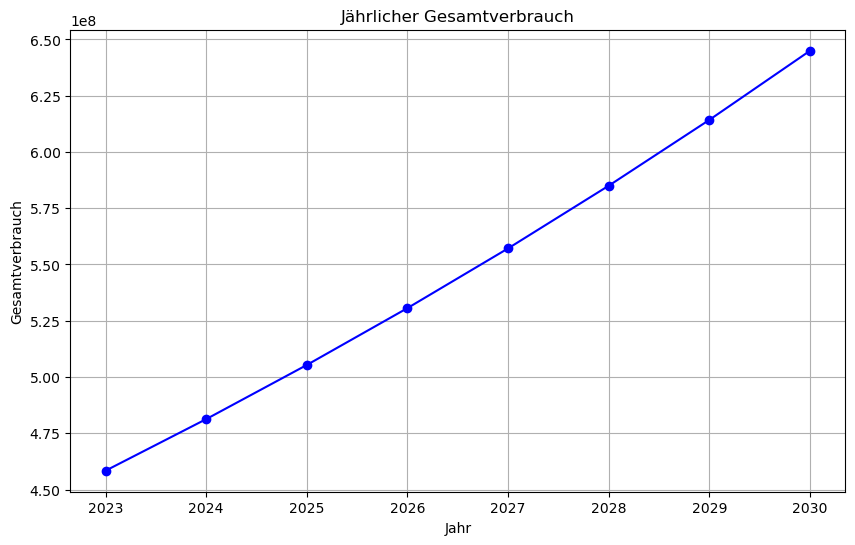

{2023:                     Datum  Gesamtverbrauch  Residuallast  Pumpspeicher  Year  \
0     2023-01-01 00:00:00          9673.00       1842.50        482.00  2023   
1     2023-01-01 00:15:00          9593.50       1691.50        469.25  2023   
2     2023-01-01 00:30:00          9562.00       1442.50        546.25  2023   
3     2023-01-01 00:45:00          9517.50       1598.50        525.50  2023   
4     2023-01-01 01:00:00          9433.25       1325.50        192.75  2023   
...                   ...              ...           ...           ...   ...   
35035 2023-12-31 22:45:00         10780.75       1706.75        373.50  2023   
35036 2023-12-31 23:00:00         10752.25       1701.00        426.50  2023   
35037 2023-12-31 23:15:00         10605.50       1610.25        476.75  2023   
35038 2023-12-31 23:30:00         10494.25       1470.25        468.25  2023   
35039 2023-12-31 23:45:00         10288.00       1338.00        540.75  2023   

      Week  
0       00  
1     

In [39]:
%run verbrauch.ipynb

In [47]:
# Daten für das gegebene Jahr und die gegebene Woche extrahieren

week_filtered_data_consumption = consumption_extrapolation[
    (consumption_extrapolation['Year'] == selectedYear) & 
    (consumption_extrapolation['Week'] == "01")
]

week_consumption_df = week_filtered_data_consumption[['Datum', 'Gesamtverbrauch']]


print(directory_yearly_generation)

# Daten für das gegebene Jahr und die gegebene Woche extrahieren
"""
week_filtered_data_production = directory_yearly_generation[
    (directory_yearly_generation['Year'] == selectedYear) & 
    (directory_yearly_generation['Week'] == "01")
]

week_production_df = week_filtered_data_production[['Datum', 'Photovoltaik']]
"""

{2015:                     Datum  Wind Offshore  Wind Onshore  Photovoltaik  \
0     2015-01-01 00:00:00         130.00       2028.25           0.0   
1     2015-01-01 00:15:00         129.25       2023.00           0.0   
2     2015-01-01 00:30:00         128.50       2040.25           0.0   
3     2015-01-01 00:45:00         128.75       2036.50           0.0   
4     2015-01-01 01:00:00         128.75       2045.75           0.0   
...                   ...            ...           ...           ...   
35035 2015-12-31 22:45:00         538.75       1358.00           0.0   
35036 2015-12-31 23:00:00         572.50       1324.75           0.0   
35037 2015-12-31 23:15:00         575.25       1320.50           0.0   
35038 2015-12-31 23:30:00         571.50       1327.75           0.0   
35039 2015-12-31 23:45:00         574.00       1324.75           0.0   

           Time Month Year Month Year Month Day Day  Year Weekday Week  
0      00:00:00   Jan    2015 01     2015 01 01  01  20

'\nweek_filtered_data_production = directory_yearly_generation[\n    (directory_yearly_generation[\'Year\'] == selectedYear) & \n    (directory_yearly_generation[\'Week\'] == "01")\n]\n\nweek_production_df = week_filtered_data_production[[\'Datum\', \'Photovoltaik\']]\n'

/var/folders/0n/gbh_jry53x71gbfrplg1wthm0000gs/T/ipykernel_20624/1701542691.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datum'] = pd.to_datetime(data['Datum'])


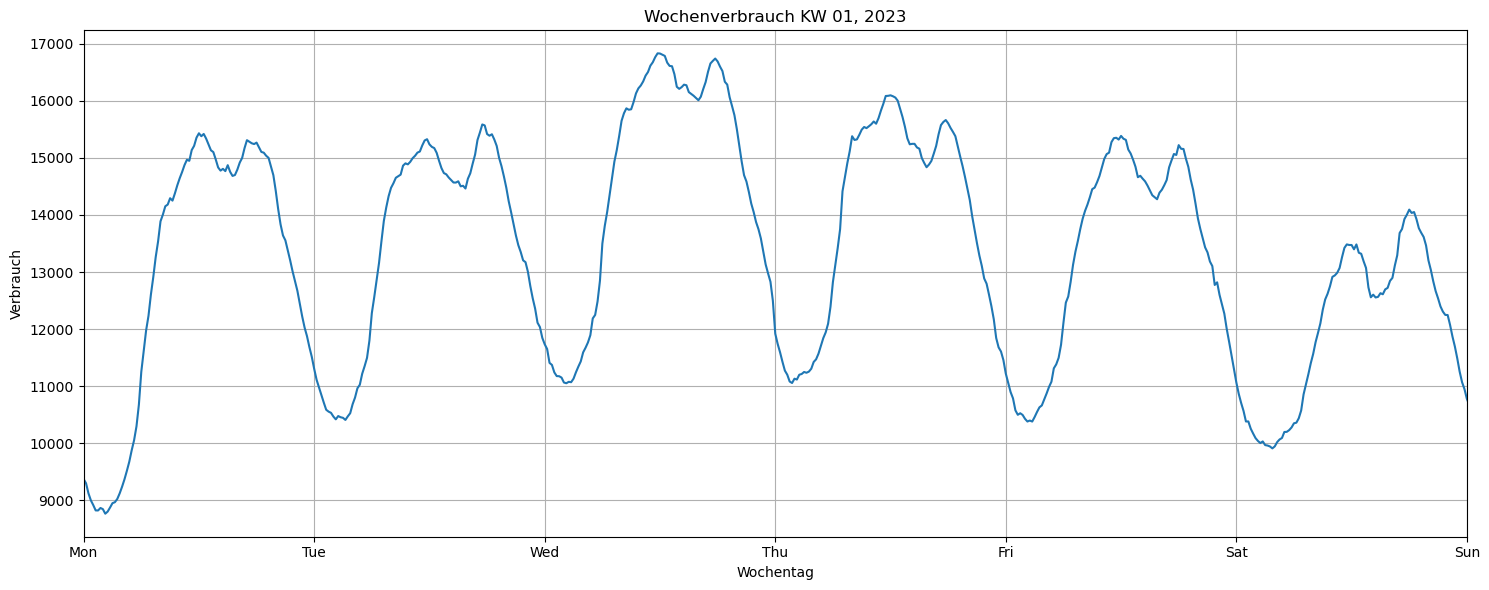

In [48]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter

# wochen diagramm für verbrauch und erzeugugn

selectedYear = "2023"
selectedWeek = "01"

#verbrauch_data = week_filtered_data['Gesamtverbrauch'].values

def create_week_diagram(year, week, data):
    # Datumsspalte in datetime-Objekte umwandeln
    data['Datum'] = pd.to_datetime(data['Datum'])
    
    # Überprüfen, ob die Woche weniger als 7 Tage hat
    start_date = data['Datum'].min()
    end_date = data['Datum'].max()
    num_days = (end_date - start_date).days + 1
    
    # Figure und Axes erstellen
    fig, ax = plt.subplots(figsize=(15, 6))
    
    # Daten plotten
    ax.plot(data['Datum'], data['Gesamtverbrauch'])
    
    # X-Achse formatieren
    ax.xaxis.set_major_locator(DayLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter('%a'))
    
    # X-Achse anpassen, um die gesamte Woche anzuzeigen
    ax.set_xlim(start_date, start_date + timedelta(days=6))
    
    # Labels
    ax.set_xlabel('Wochentag')
    ax.set_ylabel('Verbrauch')
    ax.set_title(f'Wochenverbrauch KW {week}, {year}')
    
    # Grid hinzufügen
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()




create_week_diagram(selectedYear, selectedWeek, week_consumption_df)
